In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare, ttest_ind, t

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/My Drive/MBA/Aula 2 - Fundamentos da Estatística I
!ls

Mounted at /content/drive/
/content/drive/My Drive/MBA/Aula 2 - Fundamentos da Estatística I
'aula 2 - ex1.txt'
'aula 2 - ex2.txt'
'aula 2 - ex8.txt'
'aula 2 - ex9.txt'
'Caderno do Aluno com Módulo Introdutório.pdf'
'Lista de Exercícios - Complementares.pdf'
'Lista de Exercícios - Complementares.xlsx'
'Planilha Suporte - Fundamentos de Estatística.xlsx'
'Resolução de exercícios.ipynb'
'Slides Fundamentos Estatística 3, 5 e 10.05.23.pdf'


## Exercício 1

In [ ]:
ex1 = pd.read_csv('aula 2 - ex1.txt')
ex1.head()

,Observação,Renda (R$)
0,1,2893.70
1,2,3448.38
2,3,1460.81
3,4,2223.70
4,5,2500.70


In [ ]:
## a)
bins = [0, 2000, 4000, 6000, 8000, 10000, 12000]
ex1['Faixa de Renda'] = pd.cut(ex1['Renda (R$)'], bins)
ex1.head(10)

,Observação,Renda (R$),Faixa de Renda
0,1,2893.70,"(2000, 4000]"
1,2,3448.38,"(2000, 4000]"
2,3,1460.81,"(0, 2000]"
3,4,2223.70,"(2000, 4000]"
4,5,2500.70,"(2000, 4000]"
5,6,1100.25,"(0, 2000]"
6,7,3560.10,"(2000, 4000]"
7,8,5510.76,"(4000, 6000]"
8,9,2900.90,"(2000, 4000]"
9,10,10127.50,"(10000, 12000]"


In [ ]:
## b)

freq = pd.DataFrame(ex1.value_counts('Faixa de Renda',  sort = False))
freq.columns = ['Frequência Absoluta']
freq['Frequência Relativa (%)'] = np.round(100*freq['Frequência Absoluta']/len(ex1),2)
freq['Frequência Acumulada'] = freq['Frequência Absoluta'].cumsum()
freq['Frequência Relativa Acumulada (%)'] = np.round(100*freq['Frequência Acumulada']/len(ex1),2)

freq

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
Faixa de Renda,,,,
"(0, 2000]",9,18.0,9,18.0
"(2000, 4000]",19,38.0,28,56.0
"(4000, 6000]",11,22.0,39,78.0
"(6000, 8000]",5,10.0,44,88.0
"(8000, 10000]",4,8.0,48,96.0
"(10000, 12000]",2,4.0,50,100.0


<BarContainer object of 6 artists>

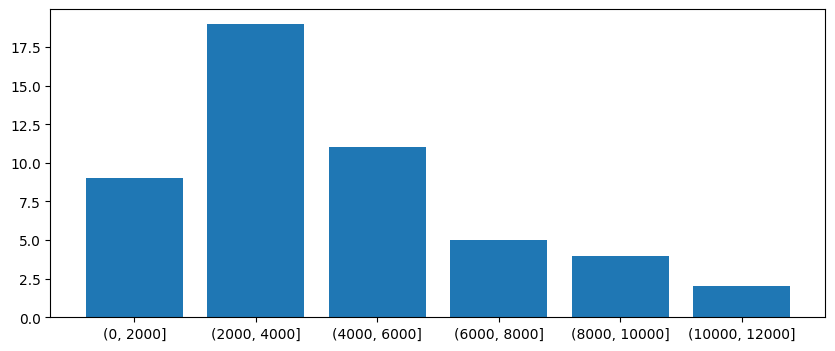

In [ ]:
plt.figure(figsize = (10,4))
plt.bar(['(0, 2000]','(2000, 4000]','(4000, 6000]','(6000, 8000]','(8000, 10000]','(10000, 12000]'], freq['Frequência Absoluta'])

## Exercício 2

In [ ]:
ex2 = pd.read_csv('aula 2 - ex2.txt', index_col = 0)
ex2.head()

,Ação 1,Ação 2
Meses,,
1,-0.0212,0.2645
2,0.2438,0.2086
3,0.2296,0.1248
4,-0.2018,0.0209
5,0.1296,0.2055


In [ ]:
stats = ex2.describe()
stats.loc['corr'] = [np.round(ex2.corr().iloc[0,1],2),np.round(ex2.corr().iloc[0,1],2)]
stats.loc['amplitude'] = stats.loc['max'] - stats.loc['min']
stats.loc['var'] = stats.loc['std']**2
stats.loc['erro padrão'] = stats.loc['std']/np.sqrt(len(ex2))
stats.loc['CV'] = 100*stats.loc['std']/stats.loc['mean']

stats

,Ação 1,Ação 2
count,23.000000,23.000000
mean,0.035204,0.151135
std,0.129221,0.203822
min,-0.201800,-0.149000
25%,-0.061200,0.020400
50%,0.037000,0.124800
75%,0.116050,0.233300
max,0.281400,0.626000
corr,0.290000,0.290000
amplitude,0.483200,0.775000


## Exercício 3

In [ ]:
## a)

np.math.factorial(10)/(np.math.factorial(4)*np.math.factorial(6))*((1/6)**4) * ((5/6)**6)

0.05426587585098817

In [ ]:
## b)

def bin(n,k,p):
  return np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))*((p)**k) * ((1-p)**(n-k))

bin(10,7,1/6) + bin(10,8,1/6) + bin(10,9,1/6) + bin(10,10,1/6)

0.00026752146522379715

## Exercício 4

In [ ]:
n = 20
k = 12
p = 3/5
np.math.factorial(n-1)/(np.math.factorial(k-1)*np.math.factorial((n-1)-(k-1)))*((p)**k) * ((1-p)**(n-k))

0.10782347265281361

## Exercício 5




In [ ]:
np.exp(-3)*(3**4)/np.math.factorial(4)

0.16803135574154082

## Exercício 6

In [ ]:
## a) P(X>37)

1 - norm.cdf(37, loc = 26.5, scale = 4)

0.004332448363012609

In [ ]:
## b) P(X<20)

norm.cdf(20, loc = 26.5, scale = 4)

0.05208127941521953

In [ ]:
## c) P(22<X<28)

norm.cdf(28, loc = 26.5, scale = 4) - norm.cdf(22, loc = 26.5, scale = 4) 

0.5158752495359149

## Exercício 7

In [ ]:
ex7 = pd.DataFrame(index = ['Livro A','Livro B','Livro C'])
ex7['Frequência Real'] = [29,15,16]
ex7['Frequência Esperada'] = [20,20,20]
ex7['est. qui-quad'] = ((ex7['Frequência Real'] - ex7['Frequência Esperada'])**2)/ex7['Frequência Esperada']
ex7.loc['Total'] = ex7.sum()

ex7

,Frequência Real,Frequência Esperada,est. qui-quad
Livro A,29.0,20.0,4.05
Livro B,15.0,20.0,1.25
Livro C,16.0,20.0,0.80
Total,60.0,60.0,6.10


In [ ]:
chisquare(f_obs = ex7.iloc[:-1,0], f_exp = ex7.iloc[:-1,1])

Power_divergenceResult(statistic=6.1, pvalue=0.04735892439114093)

como o $p-valor < \alpha$, rejeitamos $H_0$

## Exercício 8

In [ ]:
ex8 = pd.read_csv('aula 2 - ex8.txt')
ex8.head()

,Local A (mm),Local B (mm)
0,8.9,5.6
1,7.7,4.9
2,8.6,6.6
3,3.9,5.9
4,7.6,6.5


In [ ]:
len(ex8)

14

In [ ]:
teste = pd.DataFrame(index = [ex8.columns])
teste['std'] = [ex8.std()[0] , ex8.std()[1]]
teste['var'] = teste['std']**2

teste

# H0: var(A) = var(B)
# H1: var(A) > var(B)

,std,var
Local A (mm),3.406523,11.604396
Local B (mm),2.050047,4.202692


In [ ]:
# estatística de teste

teste.iloc[0,1]/teste.iloc[1,1]

2.761181346337381

Pela tabela de valores críticos da distribuição F (https://perguntasaopo.files.wordpress.com/2012/02/aula_10_anova.pdf), com GL = 13 para numerador e denominador a significância 5%, o valor crítico é 2.6 < 2.7, portanto rejeitamos a hipótese nula de que as variânicas são estatisticamente iguais.

## Exercício 9

Teste bilateral para verificar se as médias de tempo de espera em cada hospital são diferntes a nível de significância 1%

$$H_0: \theta_0 = \theta_1$$

$$H_1: \theta_0 \neq \theta_1$$


como o $p-valor < \alpha$, rejeitamos $H_0$

In [ ]:
ex9 = pd.read_csv('aula 2 - ex9.txt')
ex9.describe()

,Hospital 1,Hospital 2
count,20.000000,20.000000
mean,81.500000,57.800000
std,11.736134,9.838699
min,58.000000,40.000000
25%,72.750000,50.750000
50%,81.000000,56.000000
75%,91.000000,66.000000
max,101.000000,76.000000


In [ ]:
ttest_ind(ex9.iloc[:,0], ex9.iloc[:,1])

Ttest_indResult(statistic=6.920824033665959, pvalue=3.147827649441996e-08)

In [ ]:
## intervalos de confiança
## H1

m = ex9.describe().loc['mean'][0]
s = ex9.describe().loc['std'][0]
dof = ex9.describe().loc['count'][0] -1 
confidence = 0.99

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(dof+1), m+s*t_crit/np.sqrt(dof+1)) 

(73.99210839145069, 89.00789160854931)

In [ ]:
## H2

m = ex9.describe().loc['mean'][1]
s = ex9.describe().loc['std'][1]
dof = ex9.describe().loc['count'][0] -1 
confidence = 0.99

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(dof+1), m+s*t_crit/np.sqrt(dof+1)) 

(51.50594386581019, 64.09405613418981)

## Exercício 10

testar $H_0: \overline{\theta} = 60$ contra $H_1:\overline{\theta} > 60$ com $\alpha = 5\%$

$n=36$

$m = 65$

$std = 3.5$


como o $p-valor < \alpha$, rejeitamos $H_0$

In [ ]:
# estatística de teste

t_test = (65 - 60)/(3.5/np.sqrt(36))
t.sf(abs(t_test), df=35)

2.0335648970635718e-10

## Exercício 11

testar $H_0: \overline{\theta} = 8$ contra $H_1:\overline{\theta} > 8$ com $\alpha = 5\%$

$n=85$

$m = 8.25$

$std = 1$


como o $p-valor < \alpha$, rejeitamos $H_0$

In [21]:
# estatística de teste

t_test = (8.25 - 8)/(1/np.sqrt(85))
t.sf(abs(t_test), df=84) 

0.01181996740154383

## Exercício 12


In [ ]:
m = 226
s = 10
dof = 425 -1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(dof+1), m+s*t_crit/np.sqrt(dof+1)) 

(225.04655622436178, 226.95344377563822)